In [15]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#importing and displaying dataset
df = pd.read_csv('/content/energydata_complete (1).csv')
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [5]:
simple_linear_reg_df = df[['T2', 'T6']].sample(20, random_state=2)

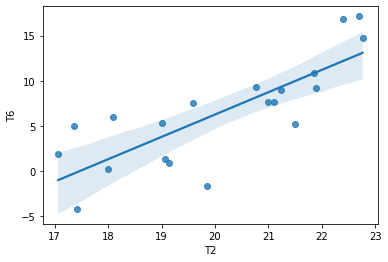

In [7]:
# Plotting a regression plot
sns.regplot(x='T2', y='T6', data=simple_linear_reg_df);

In [24]:
# Creating my x and y for fitting models
x = df[['T2']]
y = df[['T6']]

In [25]:
# Initialising x and y
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [27]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

predicted_values = linear_model.predict(x_test)

In [28]:
predicted_values

array([[ 1.41687654],
       [13.28533986],
       [ 9.88057444],
       ...,
       [ 8.626968  ],
       [ 5.36314059],
       [14.93208915]])

In [29]:
#Finding the r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.65

In [33]:
# Dropping columns ('date' and 'lights') as requested
df = df.drop(['date', 'lights'], axis=1)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [36]:
# NOrmalizing dataset with MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
normalised_df.head(3)


,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848


In [41]:
# Initialising my x and y columns
x = normalised_df.drop('Appliances', axis=1)
y = normalised_df['Appliances']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [42]:
# Fitting LinearRegression to dataset
normalised_df_model = LinearRegression()
normalised_df_model.fit(x_train, y_train)

LinearRegression()

In [43]:
# Predicting scores
predicted_normalised_df = normalised_df_model.predict(x_test)
predicted_normalised_df

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [44]:
mae = mean_absolute_error(y_test, predicted_normalised_df)
round(mae, 2)

0.05

In [47]:
# Finding the RSS (Residual Sum of Squares)
rss = np.sum(np.square(y_test - predicted_normalised_df))

round(rss, 2)

45.35

In [48]:
# Finding the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predicted_normalised_df))
round(rmse, 3)

0.088

In [52]:
# Coefficient of determination
r2_score = r2_score(y_test, predicted_normalised_df)

TypeError: ignored

In [65]:
#comparing the effects of regularisation
def get_weights_data(model, feat, col_name):

 #this function returns the weight of every feature
 weights = pd.Series(model.coef_, feat.columns).sort_values()
 weights_data = pd.DataFrame(weights).reset_index()
 weights_data.columns = ['Features', col_name]
 weights_data[col_name].round(3)
 return weights_data

 

In [74]:
linear_model_weights = get_weights_data(normalised_df_model, x_test, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281



### The features that have the lowest and highest weights RH_2 and RH_1 respectively

In [75]:
# Ridge Regression 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [76]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_normalised_df))
round(rmse, 3)

0.088

Root Maen Square remains thesame

In [82]:
from sklearn import linear_model
lasso_df = linear_model.Lasso(alpha=0.001)
lasso_df.fit(x_train, y_train)
lasso_pred = lasso_df.predict(x_test)

lasso_weights_data = get_weights_data(lasso_df, x_train, 'Lasso_weight')
lasso_weights_data

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


### WE have 4 non zero features

In [83]:
# getting the new RMSE
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(rmse, 3)

0.094